In [1]:
# Load the KAG conversion data and do a quick exploratory summary to answer:
# Which age and gender groups drive highest sales (Approved_Conversion), highest ad spend (Spent), and their conversion efficiency (Approved_Conversion per Click and per Spent)?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Read Data
file_path = 'D:\IIT G Data Analytics Program\Hackathon\Data\File\KAG_conversion_data_raw.csv'
df_conv = pd.read_csv(file_path)
print('Loaded KAG_conversion_data_raw.csv with shape:', df_conv.shape)
print(df_conv.head())

Loaded KAG_conversion_data_raw.csv with shape: (1143, 11)
    ad_id  xyz_campaign_id  fb_campaign_id    age gender  interest  \
0  708746              916          103916  30-34      M        15   
1  708749              916          103917  30-34      M        16   
2  708771              916          103920  30-34      M        20   
3  708815              916          103928  30-34      M        28   
4  708818              916          103928  30-34      M        28   

   Impressions  Clicks  Spent  Total_Conversion  Approved_Conversion  
0         7350       1   1.43                 2                    1  
1        17861       2   1.82                 2                    0  
2          693       0   0.00                 1                    0  
3         4259       1   1.25                 1                    0  
4         4133       1   1.29                 1                    1  


In [7]:
# Basic cleaning: ensure numeric types
num_cols = ['Impressions', 'Clicks', 'Spent', 'Total_Conversion', 'Approved_Conversion']
for c in num_cols:
    df_conv[c] = pd.to_numeric(df_conv[c], errors='coerce')

In [8]:
# Drop rows with missing critical fields
df_clean = df_conv.dropna(subset=['age', 'gender', 'Spent', 'Approved_Conversion', 'Clicks'])
print('After cleaning, shape:', df_clean.shape)

# Aggregate by age and gender
agg = df_clean.groupby(['age', 'gender'], as_index=False).agg({
    'Spent': 'sum',
    'Clicks': 'sum',
    'Approved_Conversion': 'sum'
})

After cleaning, shape: (1143, 11)


In [9]:
# Compute efficiency metrics
agg['Conv_per_Click'] = np.where(agg['Clicks'] > 0, agg['Approved_Conversion'] / agg['Clicks'], np.nan)
agg['Conv_per_Spent'] = np.where(agg['Spent'] > 0, agg['Approved_Conversion'] / agg['Spent'], np.nan)

# Rank groups
agg['Rank_Sales'] = agg['Approved_Conversion'].rank(ascending=False, method='dense')
agg['Rank_Spend'] = agg['Spent'].rank(ascending=False, method='dense')

In [10]:
# Identifying top groups as per problem statement 
top_sales = agg.sort_values('Approved_Conversion', ascending=False).head(5)
top_spend = agg.sort_values('Spent', ascending=False).head(5)
print('Top groups by sales (Approved_Conversion):')
print(top_sales[['age','gender','Approved_Conversion','Spent','Clicks','Conv_per_Click','Conv_per_Spent']])
print('Top groups by spend (Spent):')
print(top_spend[['age','gender','Approved_Conversion','Spent','Clicks','Conv_per_Click','Conv_per_Spent']])

Top groups by sales (Approved_Conversion):
     age gender  Approved_Conversion         Spent  Clicks  Conv_per_Click  \
1  30-34      M                  299   7640.919991    4384        0.068203   
0  30-34      F                  195   7611.479995    5099        0.038243   
3  35-39      M                  112   5051.080003    2933        0.038186   
6  45-49      F                  112  13433.209993    9441        0.011863   
7  45-49      M                   96   7317.460004    4411        0.021764   

   Conv_per_Spent  
1        0.039131  
0        0.025619  
3        0.022173  
6        0.008338  
7        0.013119  
Top groups by spend (Spent):
     age gender  Approved_Conversion         Spent  Clicks  Conv_per_Click  \
6  45-49      F                  112  13433.209993    9441        0.011863   
1  30-34      M                  299   7640.919991    4384        0.068203   
0  30-34      F                  195   7611.479995    5099        0.038243   
4  40-44      F            

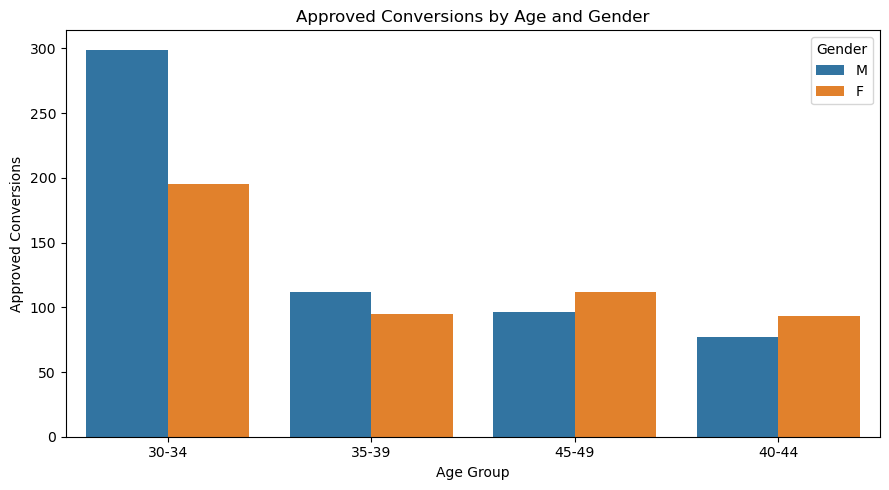

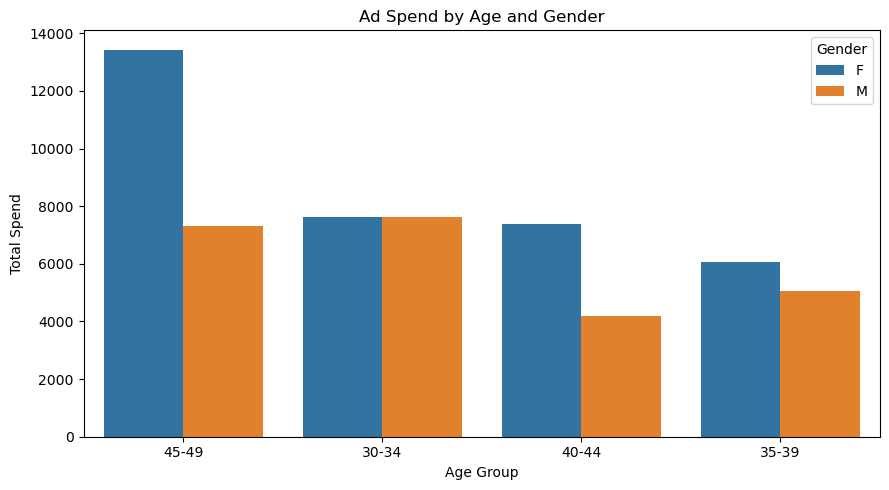

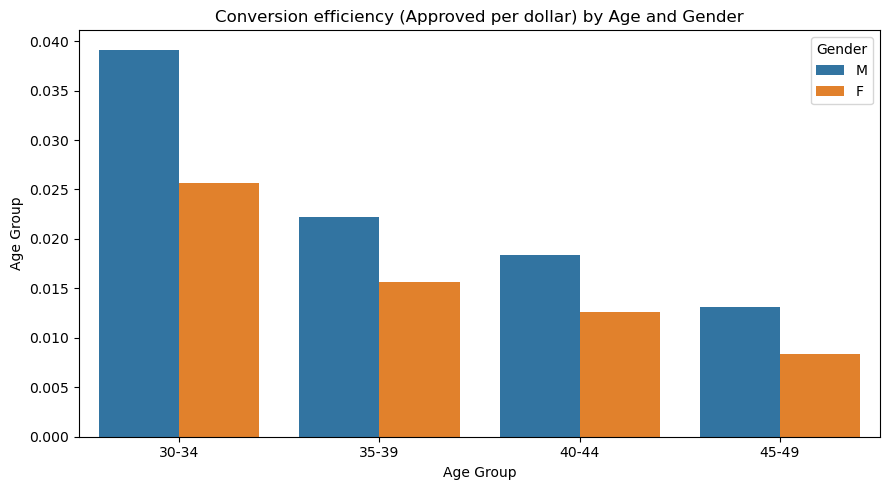

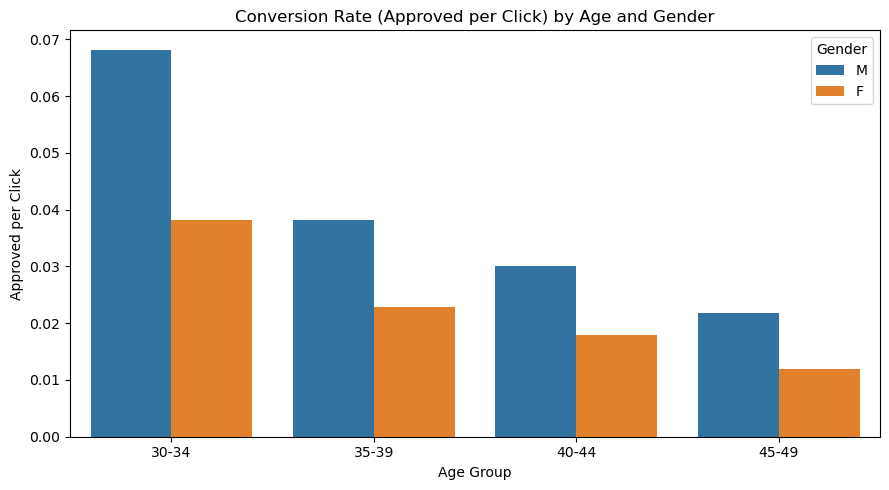

In [16]:
#Visualizations

plt.figure(figsize =(9,5))
sns.barplot (data=agg.sort_values('Approved_Conversion', ascending=False), x='age', y ='Approved_Conversion', hue ='gender')
plt.title ('Approved Conversions by Age and Gender')
plt.ylabel ('Approved Conversions')
plt.xlabel ('Age Group')
plt.legend(title = 'Gender')
plt.tight_layout()
plt.show()

plt.figure(figsize =(9,5))
sns.barplot (data=agg.sort_values('Spent', ascending=False), x='age', y ='Spent', hue ='gender')
plt.title ('Ad Spend by Age and Gender')
plt.ylabel ('Total Spend')
plt.xlabel ('Age Group')
plt.legend(title = 'Gender')
plt.tight_layout()
plt.show()

plt.figure(figsize =(9,5))
sns.barplot (data=agg.sort_values('Conv_per_Spent', ascending=False), x='age', y ='Conv_per_Spent', hue ='gender')
plt.title ('Conversion efficiency (Approved per dollar) by Age and Gender')
plt.ylabel ('Age Group')
plt.xlabel ('Age Group')
plt.legend(title = 'Gender')
plt.tight_layout()
plt.show()

plt.figure(figsize=(9,5))
sns.barplot(data=agg.sort_values('Conv_per_Click', ascending=False), x='age', y='Conv_per_Click', hue='gender')
plt.title('Conversion Rate (Approved per Click) by Age and Gender')
plt.ylabel('Approved per Click')
plt.xlabel('Age Group')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

In [17]:
# Provide a concise table sorted by sales and spend for reference
summary = agg.sort_values(['Approved_Conversion','Spent'], ascending=[False, False]).reset_index(drop=True)
print('Summary by age x gender (top 10 by sales):')
print(summary.head(10))

Summary by age x gender (top 10 by sales):
     age gender         Spent  Clicks  Approved_Conversion  Conv_per_Click  \
0  30-34      M   7640.919991    4384                  299        0.068203   
1  30-34      F   7611.479995    5099                  195        0.038243   
2  45-49      F  13433.209993    9441                  112        0.011863   
3  35-39      M   5051.080003    2933                  112        0.038186   
4  45-49      M   7317.460004    4411                   96        0.021764   
5  35-39      F   6061.349992    4161                   95        0.022831   
6  40-44      F   7396.579984    5177                   93        0.017964   
7  40-44      M   4193.149997    2559                   77        0.030090   

   Conv_per_Spent  Rank_Sales  Rank_Spend  
0        0.039131         1.0         2.0  
1        0.025619         2.0         3.0  
2        0.008338         3.0         1.0  
3        0.022173         3.0         7.0  
4        0.013119         4.0     